In [1]:
import numpy as np
from PIL import Image

from ai_code.image_annotator import ImageAnnotator
from ai_code.masks_inpainting import ImageProcessor

DEBUG_MODE = False

%load_ext autoreload
%autoreload 2

In [2]:
# Create an instance
annotator = ImageAnnotator()

# Run the annotation tool with your image path
annotator.start_annotation("images/base/abstract_waves.png")

Controls:
- Left click: Add positive point (green)
- Middle click: Add negative point (red)
- 'p': Switch to point mode
- 'r': Switch to rectangle mode
- 'q': Quit
Switched to rectangle mode


In [3]:
# Get the annotations
results = annotator.get_annotations()

# Print them
print("Points and their labels:", [(p,l) for p,l in zip(results['points'],results['point_labels'])])
print("Rectangles:", results['rectangles'])

Points and their labels: [([106, 60], 1), ([106, 59], 1), ([315, 78], 1), ([457, 151], 1), ([617, 189], 1), ([729, 79], 1), ([501, 256], 1), ([125, 153], 0), ([219, 171], 0), ([384, 265], 0), ([554, 321], 0), ([746, 226], 0)]
Rectangles: [[57, 16, 825, 299]]


In [4]:
# Initialize the processor
processor = ImageProcessor("https://303d-151-230-234-180.ngrok-free.app")

# Example annotations
annotations = {
    'points': results['points'],
    'point_labels': results['point_labels'],
    'rectangles': results['rectangles']
}

image_path = "images/base/abstract_waves.png"

# 1. Using file path
mask1 = processor.generate_mask(image_path, annotations)

if DEBUG_MODE:
    # 2. Using PIL Image
    pil_image = Image.open(image_path)
    mask2 = processor.generate_mask(pil_image, annotations)

    # 3. Using numpy array
    np_array = np.array(Image.open(image_path).convert("RGB")).astype("uint8")
    mask3 = processor.generate_mask(np_array, annotations)

    # 4. Using bytes
    with open(image_path, "rb") as f:
        image_bytes = f.read()
    mask4 = processor.generate_mask(image_bytes, annotations)

    # 5. Using file object
    with open(image_path, "rb") as f:
        mask5 = processor.generate_mask(f, annotations)

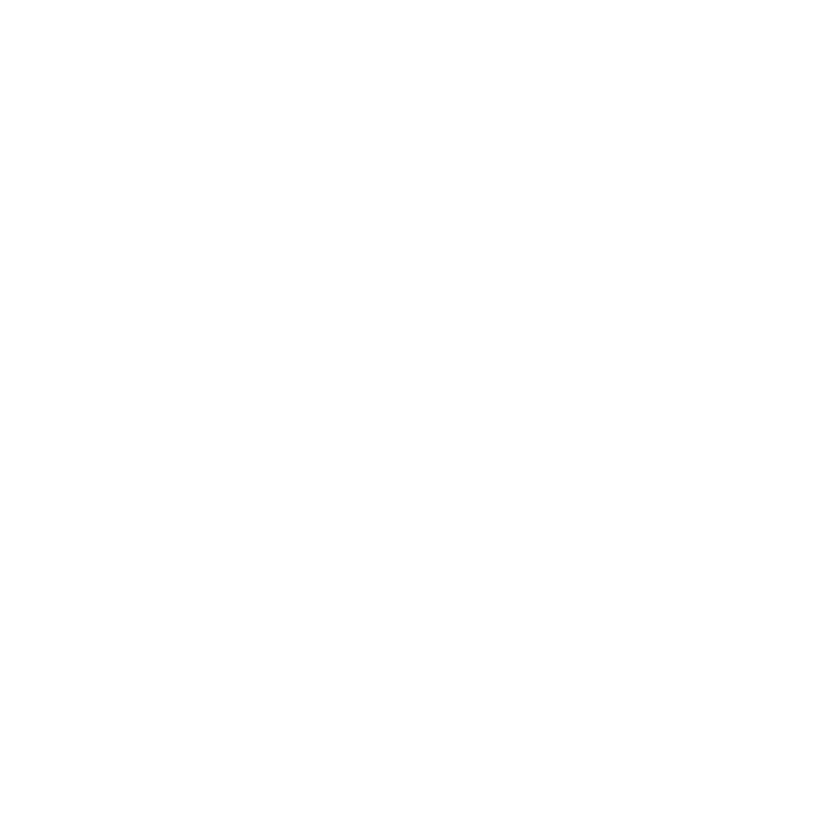

In [5]:
mask1

In [23]:
with open(image_path, "rb") as f:
    inpainted_image = processor.inpaint_image(
        f,
        mask1,
        positive_prompt="bright red",
        negative_prompt="underexposed, overexposed",
        blur_mask=False,
        use_refiner=True,
        n_steps=100,
        high_noise_frac=0.6
    )

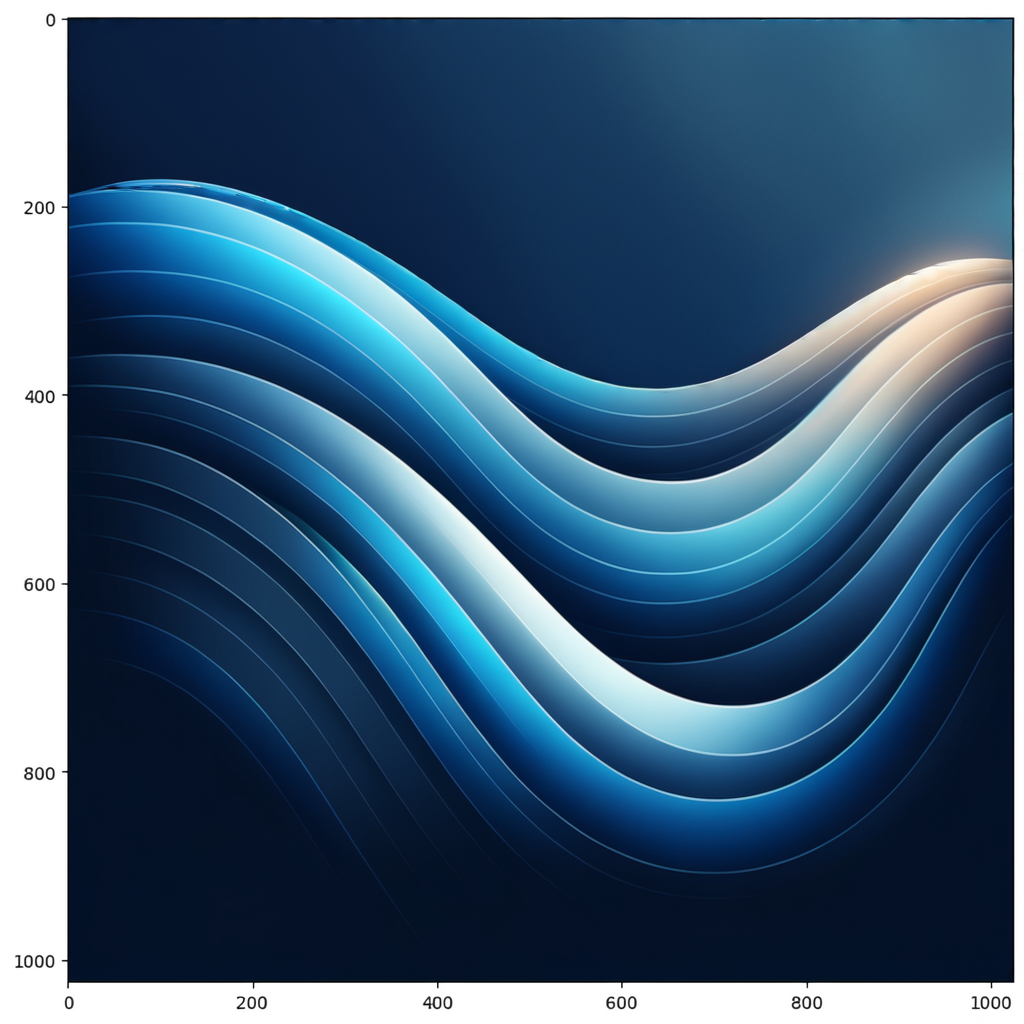

In [24]:
inpainted_image